# Week 1: Setup + EDA

## 1. Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

os.chdir(r"C:/Users/User/OneDrive/Desktop/SDS/SDS-CP038-banktermpredict")

## 2. Import Data

In [5]:
full_bank_data = pd.read_csv('Data/bank-full.csv', sep=';')
full_bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
additional_bank_data = pd.read_csv('Data/bank-additional/bank-additional-full.csv', sep=';')
additional_bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 3. Data Quality Checks

3.1 Missing Values

In [6]:
full_bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
additional_bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

3.2 Duplicates

In [10]:
full_bank_data.duplicated().sum()

0

In [11]:
additional_bank_data.duplicated().sum()

12

In [ ]:
additional_bank_data.drop_duplicates(inplace=True)
additional_bank_data.duplicated().sum()

In [15]:
additional_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

3.3 Data Types Consistency

In [18]:
print(additional_bank_data.info())
print(full_bank_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [19]:
full_bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


3.4 Outliers (domain checks, IQR/z-score)

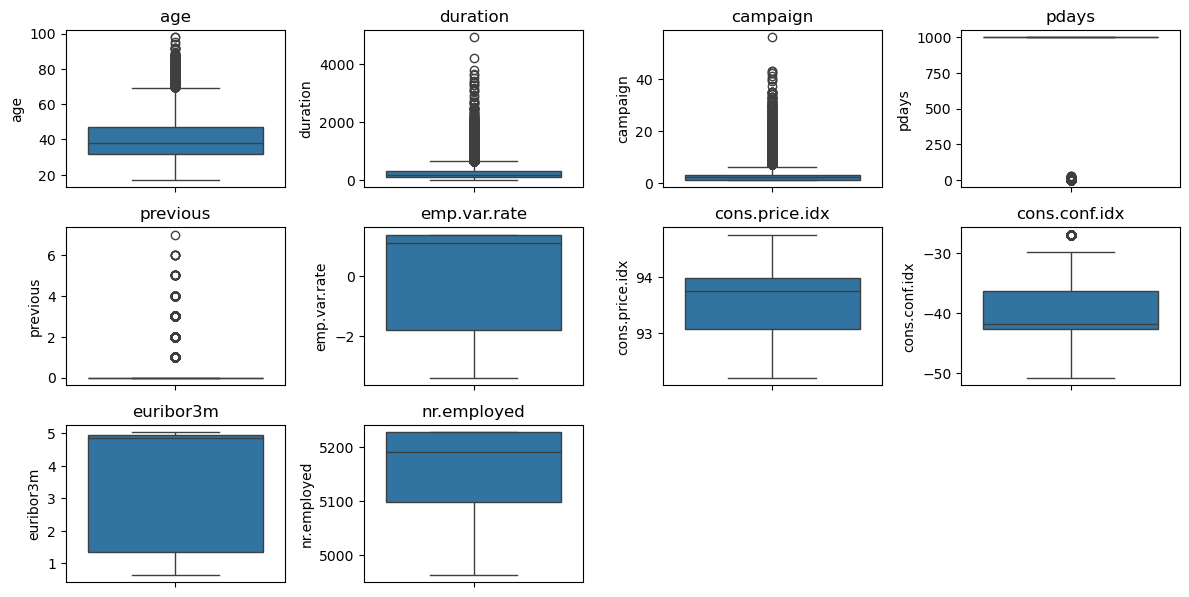

In [ ]:
# Select numerical features for visualization
additional_bank_numerical_features = additional_bank_data.select_dtypes(include=['int64', 'float64'])
numerical_features = additional_bank_numerical_features.columns.tolist()

# Box plots for numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=additional_bank_numerical_features, y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

## 4. Exploratory Data Analysis (EDA)

4.1 Univariate Distributions (histograms, KDE, boxplots)

4.2 Bivariate Relationships (scatter, groupby stats)

4.4 Target Variable (`y`) Inspection

4.5 Class Balance (counts, %)

## 5. Feature Engineering

5.1 Domain Features

5.2 Aggregations / Ratios / Interactions

5.3 Temporal/Recency Features (if applicable)

5.4 Feature Documentation (what, why, how)

## 6. Imbalance Handling (Preliminary)

6.1 Strategy Rationale (SMOTE vs. Class Weights vs. Thresholding)

6.2 Chosen Approach & Justification

6.3 Sanity Checks (no leakage, applied only to train)

---
# Week II–III: Data Preprocessing + Model Development

## 1. Preprocessing

1.1 Train/Validation/Test Split (with stratification if needed)

1.2 Categorical Encoding (label / one-hot)

1.3 Numeric Scaling (StandardScaler / MinMaxScaler)

1.4 Building Pipeline (ColumnTransformer + Pipeline)

## 2. Baseline Models

2.1 Logistic Regression (default settings)

2.2 Decision Tree (default settings)

2.3 Random Forest (default settings)

2.4 Fit → Predict → Evaluate (val set)

## 3. Boosting Experiments

3.1 XGBoost

3.2 LightGBM

## 4. Experiment Tracking (MLflow)

4.1 MLflow Setup (tracking URI, experiment name)

4.2 Log Params, Metrics, Artifacts

## 5. Evaluation & Diagnostics

## 6. Model Comparison

## 7. Hyperparameter Tuning

7.1 GridSearchCV / RandomizedSearchCV (CV strategy)

7.2 Best Params & CV Scores

7.3 Refit on Train+Val

## 8. Final Model Selection

8.1 Compare Tuned Models (val/test metrics)

8.2 Final Choice & Rationale

## 9. Save Preprocessing Pipeline + Model

---
# Week IV: Model Tuning + Deployment

## 1. Streamlit App

This step must be completed in a separate app.py file